In [557]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Networks 

## Moons and Decision boundary

## Import Statements

In [558]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             f1_score)  # Import function to calculate various metric

In [559]:
###------------------
### Global Parameters
###------------------

# # Directories
# #inpDir = '../../input'
# inpDir = Path('..') / '..' / 'input'
# # outDir = '../output'
# outDir = Path('..') / 'output'


RANDOM_STATE = 42
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng=np.random.default_rng(seed=RANDOM_STATE)
TEST_SIZE  = 0.2 # Size of test data

# Parameters for plotting
NOISE=0.2
EPOCHS=10001
ALPHA=0.1
N_SAMPLE=1000

params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [560]:
def fn_plot_decision_boundary(X: np.ndarray, y: np.ndarray, model:dict, predict):
    """
    Plots the decision boundary for a classification model along with the data points.
    
    Args:
        X (np.ndarray): Input feature matrix with shape (n_samples, 3)
        wts (np.ndarray): Weights matrix
        pred_function: Function to predict using weights and datapoints
    """
    
    # Initialize the figure with specified dimensions
    fig, ax = plt.subplots( figsize=(8, 5) )
    
    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.05
    padding = 2 * dm
    
    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    
    # Calculate the range for y-axis (second feature) with padding  
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    
    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    XX = np.c_[xx.ravel(), yy.ravel()] # Resulting shape: (n_points, 2)

    # # Add a column of ones to the coordinate array for the bias term
    # XX = np.hstack((XX, np.ones((XX.shape[0], 1)))) # make array compatible
    
    # List to collect predictions for each point in the mesh grid
    y_pred = predict(model, XX)
    
    # Iterate over each coordinate point in the mesh grid
    # for row in XX:
    #     # Make prediction for the current coordinate using global 'weights' and 'predict' function
    #     y_p = predict(model, X)
    #     y_pred.append(y_p)

        
    # Reshape predictions to match the original mesh grid dimensions
    Z = np.array(y_pred).reshape(xx.shape)

    # Create filled contour plot showing the decision regions
    ax.contourf(xx, yy, Z, alpha=0.6, cmap='rainbow')
    
    # Scatter plot of the actual data points, colored by their true class labels
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap='rainbow')
    
    # Set plot title and axis labels
    ax.set_title('Decision Boundary')
    ax.set_xlabel('A')  
    ax.set_ylabel('B') 
    
    # Display the final plot
    plt.show()

In [561]:
X,y=make_moons(n_samples=N_SAMPLE,noise=NOISE,random_state=RANDOM_STATE,shuffle=True)
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [562]:
X[:5],y[:5]

(array([[-0.11166654,  0.52022374],
        [ 1.14264982, -0.34257734],
        [ 0.79555796, -0.01144231],
        [ 0.11182668, -0.55193153],
        [-0.81646618,  0.54399604]]),
 array([1, 1, 1, 1, 0]))

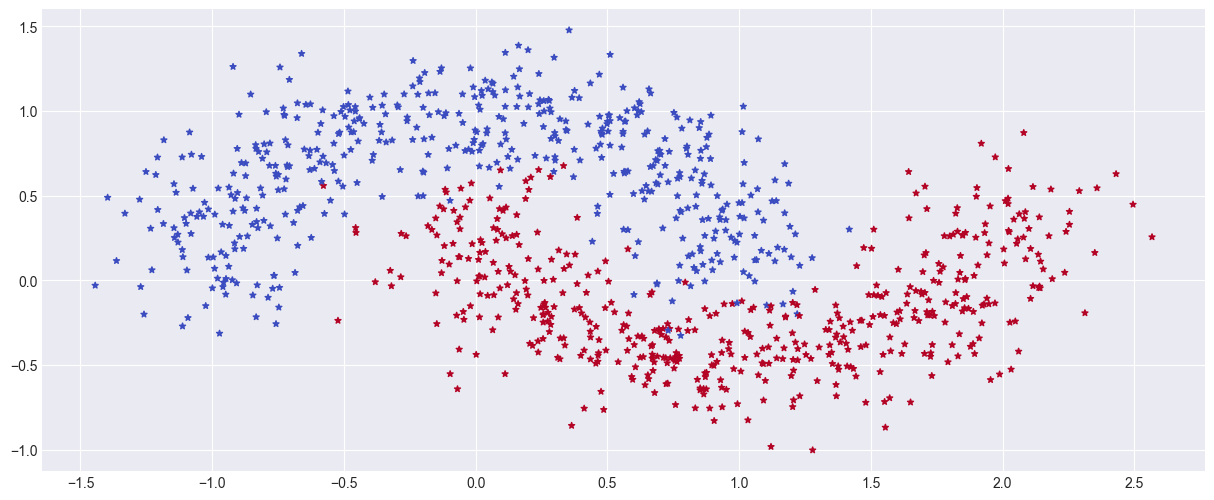

In [563]:
plt.scatter(X[:,0],X[:,1],s=20,c=y,marker='*',cmap=CMAP)

In [564]:
data_df=pd.DataFrame(X,columns=['A','B'])
data_df['target']=y
data_df.head()

,A,B,target
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0


In [566]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [567]:
def fn_sigmoid(z: np.ndarray):
    return 1/(1+np.exp(-z))

In [568]:
def fn_activ(z):
    return np.tanh(z)

def fn_activ_prime(z):
    return 1.0 - np.tanh(z)**2

In [569]:
fn_activ(np.asarray([[-1, 0, 1.0],[-np.inf, 0, np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [570]:
sm=fn_sigmoid(np.asarray([-np.inf,-1,0,1.0, np.inf]))
print(sm)

[0.         0.26894142 0.5        0.73105858 1.        ]


In [571]:
def predict(model,X):
    W1=model['W1']
    W2=model['W2']
    b1=model['b1']
    b2=model['b2']

    #Forward Propogation
    z1=X.dot(W1)+b1 #Aggregation
    a1=fn_activ(z1) #Activation

    z2=a1.dot(W2)+b2 #Aggregation
    a2=fn_sigmoid(z2) #Activation

    return a2>=0.5

In [572]:
def calculate_loss(model,X,y):
    W1=model['W1']
    W2=model['W2']
    b1=model['b1']
    b2=model['b2']
    m=X.shape[0]
    #Forward Propagation
    z1=X.dot(W1)+b1 #Aggregation
    a1=fn_activ(z1) #Activation

    z2=a1.dot(W2)+b2 #Aggregation
    a2=fn_sigmoid(z2) #Activation
    data_loss=-(y*np.log(a2)+(1-y)*np.log(1-a2)).sum()
    return data_loss/m

In [573]:
# weights=np.array([0.1,2.0,1.0]) #eXAMPLE WEIGHTS: Bias, weight1, weight2
# predict(data_df.loc[0].to_numpy(),weights)

In [574]:
def build_model(nn_hdim, X, y, alpha, n_epochs):

    m, nn_input_dim = X.shape
    nn_output_dim = y.shape[1]

    W1 = rng.random((nn_input_dim, nn_hdim))/ np.sqrt(nn_input_dim)
    W2 = rng.random((nn_hdim, nn_output_dim))/ np.sqrt(nn_hdim)

    b1 = np.zeros((1, nn_hdim))
    b2 = np.zeros((1, nn_output_dim))

    loss, epochs = [], []

    for i in range(n_epochs) :

    ## forward propagation
        z1 = X.dot(W1) + b1   #Aggregation
        a1 = fn_activ(z1)   #Activation

        z2 = a1.dot(W2) + b2  #Aggregation
        a2 = fn_sigmoid(z2)   #Activation

        #Back Propagation
        #Layer2
        dz2 = a2 - y
        assert(z2.shape == dz2.shape), f" Shape z2 {z2.shape} {dz2.shape}"
        dw2 = (a1.T).dot(dz2)
        assert(W2.shape == dw2.shape), f" Shape w2 {W2.shape} {dw2.shape}"
        db2 = np.sum(dz2, axis=0, keepdims=True)
        assert(b2.shape == db2.shape), f" Shape b2 {b2.shape} {db2.shape}"
        da1 = dz2.dot(W2.T)
        assert(a1.shape == da1.shape), f" Shape a1 {a1.shape} {da1.shape}"

        #Layer1 (Hidden Layer)
        dz1 = da1*fn_activ_prime(z1)
        assert(z1.shape == dz1.shape), f" Shape z1 {z1.shape} {dz1.shape}"
        dw1 = (X.T).dot(dz1)
        assert(W1.shape == dw1.shape), f" Shape w1 {W1.shape} {dw1.shape}"
        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert(b1.shape == db1.shape), f" Shape b2 {b1.shape} {db1.shape}"

        W1 = W1 - alpha * dw1/m
        b1 = b1 - alpha * db1/m
        W2 = W2 - alpha * dw2/m
        b2 = b2 - alpha * db2/m





        model = {'W1': W1, 'W2':W2, 'b1':b1, 'b2':b2}
        if i%1000 == 0 :
            curr_loss = calculate_loss(model, X, y)
            epochs.append(i)
            loss.append(curr_loss)
            print(f"epoch - {i} : loss - {curr_loss}")

    loss_hist['epoch'] = epochs
    loss_hist['curr_loss'] = loss

    return model





In [575]:
# pd.DataFrame(y_train).shape
loss_hist = {}
y_train = y_train.reshape(-1,1)
y_train.shape

(800, 1)

In [576]:
model = build_model(2, X_train, y_train, alpha=ALPHA, n_epochs=EPOCHS )
model['W1'].shape, model['W2'].shape, model['b1'].shape, model['b2'].shape

epoch - 0 : loss - 0.7089902324705285
epoch - 1000 : loss - 0.29782602454784857
epoch - 2000 : loss - 0.28470984014545375
epoch - 3000 : loss - 0.22979318903325718
epoch - 4000 : loss - 0.18912131396841875
epoch - 5000 : loss - 0.1654297291372618
epoch - 6000 : loss - 0.1503719902459532
epoch - 7000 : loss - 0.14005297497410044
epoch - 8000 : loss - 0.13256978982174009
epoch - 9000 : loss - 0.1269080148394952
epoch - 10000 : loss - 0.12248210017897694


((2, 2), (2, 1), (1, 2), (1, 1))

In [577]:
# error,weights=train_weights(train=data_train,alpha=ALPHA,n_epochs=EPOCHS)
# weights

In [578]:
loss_df=pd.DataFrame(loss_hist)
loss_df.head()

,epoch,curr_loss
0,0,0.708990
1,1000,0.297826
2,2000,0.284710
3,3000,0.229793
4,4000,0.189121


Text(0, 0.5, 'Loss')

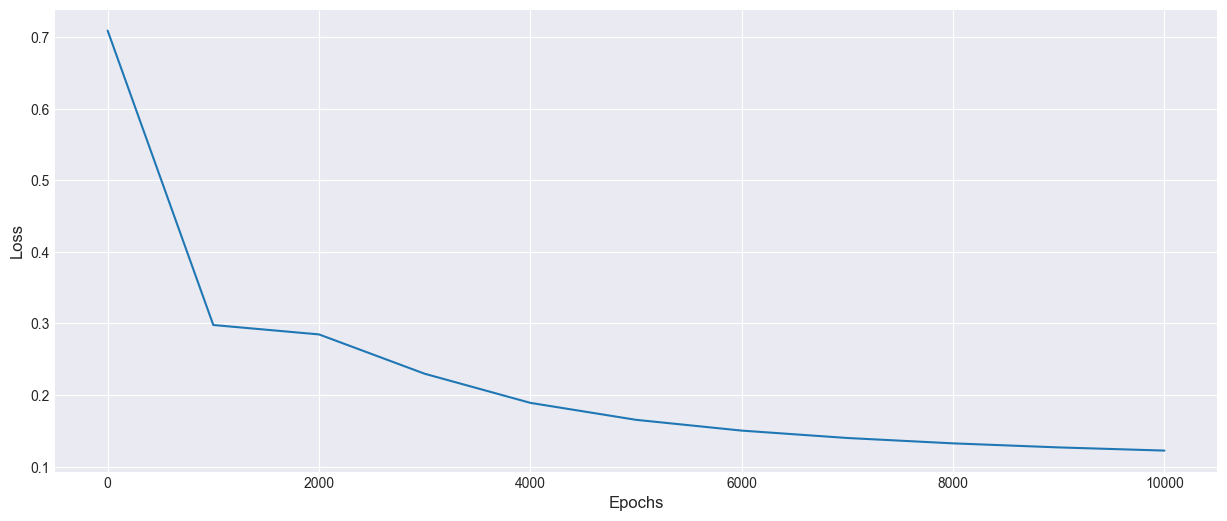

In [579]:
# plt.figure(figsize=(10,4))
fig,ax=plt.subplots()
ax.plot(loss_df['epoch'], loss_df['curr_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

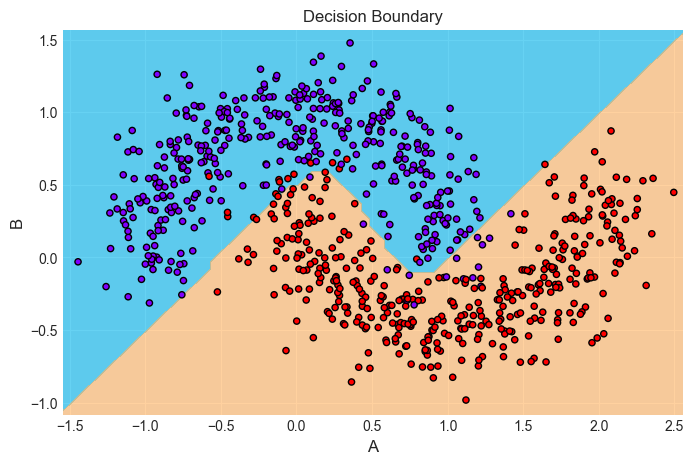

In [580]:
fn_plot_decision_boundary(X_train,y_train,model,predict)